In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


countries = pd.read_csv("Country-data.csv")

print(countries.head())

feats = countries.columns[1:]

print(feats)


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


Text(0, 0.5, 'Singular values')

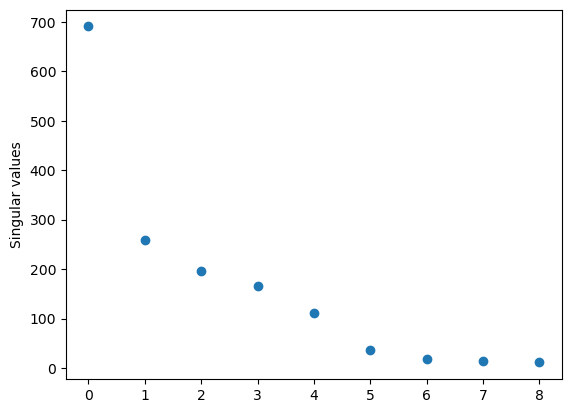

In [45]:
from sklearn.preprocessing import scale
from scipy.linalg import svd

X = countries.iloc[:, 1:].values

X_scaled = scale(X)

U, s, Vt = svd(X_scaled, full_matrices = False)

d = 2
Ud = U[:, :d]
Vd = Vt.T[:, :d]
Sigma_d = np.diag(s[:d])

Z = Ud @ Sigma_d

plt.plot(s**2, 'o')

plt.ylabel("Singular values")


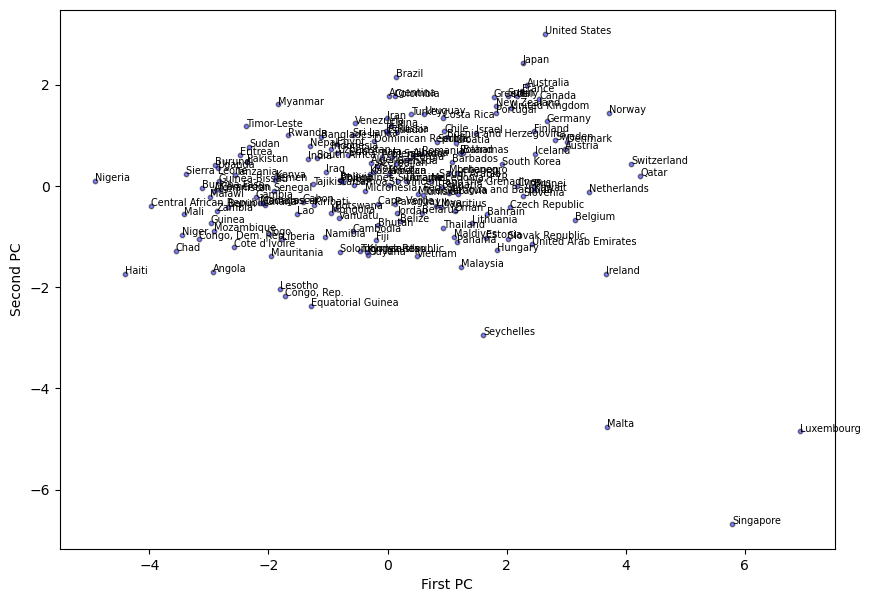

In [44]:

plt.figure(figsize=(10, 7))

plt.scatter(Z[:, 0], Z[:, 1], c="blue", s=10, alpha=0.5, edgecolor="black")


##countries_to_plot = ["United States", "Japan", "United Kingdom", "Egypt", "Singapore"]

for i, txt in enumerate(countries['country']):
    plt.text(Z[i, 0], Z[i, 1], txt, fontsize=7)
    
    ##if txt in countries_to_plot:
    ##    plt.text(Z[i, 0], Z[i, 1], txt, fontsize=10)
        

plt.xlabel("First PC")
plt.ylabel("Second PC")

plt.savefig('country_pca.pdf')


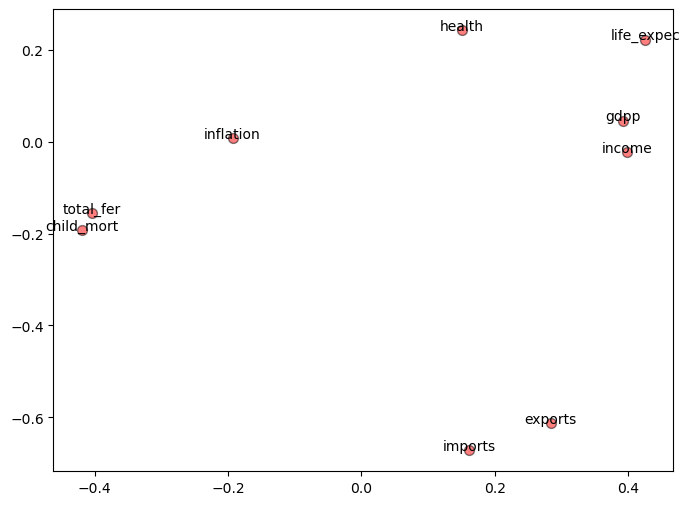

In [39]:
plt.figure(figsize=(8, 6))

plt.scatter(Vd[:, 0], Vd[:, 1], c='red', edgecolor='black', s=50, alpha=0.5)

for i, txt in enumerate(feats):
    plt.text(Vd[i, 0], Vd[i, 1], txt, fontsize=10, ha='center')
    